# Decision Tree Classification

In [41]:
#Biblioteki

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [42]:
#Dane

df = pd.read_csv("three_class_dataframe_performance.csv")
df

df.columns

Index(['age', 'gender', 'BMI', 'body fat_%', 'diastolic', 'systolic',
       'gripForce', 'sit-ups counts', 'broad jump_cm', 'class'],
      dtype='object')

In [7]:
#Zbiory
X = df[['age', 'gender', 'BMI', 'body fat_%', 'diastolic', 'systolic',
       'gripForce', 'sit-ups counts', 'broad jump_cm']]
y = df['class']

In [8]:
#Zbiór uczony i trenowany
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [9]:
#Klasyfikacja
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [10]:
#Predykcja
predictions = clf.predict(X_test)
predictions

array(['B', 'C', 'A', ..., 'A', 'C', 'A'], dtype=object)

In [11]:
#Sprawdzenie accurency
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, predictions)
print("Accurency score = ", round((ac*100),0), "%")

Accurency score =  64.0 %


In [12]:
#Tablica krzyżowa
from sklearn.metrics import confusion_matrix
a = confusion_matrix(y_test, predictions)

In [13]:
df_confusion_matrix_DT = pd.DataFrame(a.T, columns = ['A','B','C'])

In [43]:
df_confusion_matrix_DT

,A,B,C
A,675,261,66
B,254,551,214
C,65,234,690


In [15]:
df_confusion_matrix_DT.index  = ['A','B','C']
df_confusion_matrix_DT

,A,B,C
A,675,261,66
B,254,551,214
C,65,234,690


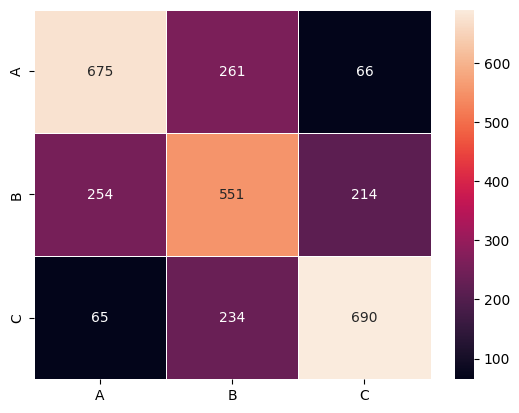

In [16]:
import matplotlib.pyplot as plt
import seaborn
seaborn.heatmap(df_confusion_matrix_DT, annot = True,linewidth=.5,fmt='.3g')
plt.show()

# KNN 

In [17]:
#Zbiór uczony i trenowany
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [18]:
#Skalowanie danych
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
#KNN klasyfikacja
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
#Zmienna predykcja
y_pred = classifier.predict(X_test)

In [21]:
#Tabele wyników
from sklearn.metrics import classification_report, confusion_matrix
#Accurency about 63% in KNN
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.61      0.74      0.67       647
           B       0.52      0.50      0.51       657
           C       0.81      0.67      0.73       703

    accuracy                           0.64      2007
   macro avg       0.64      0.64      0.64      2007
weighted avg       0.65      0.64      0.64      2007

[[481 148  18]
 [236 327  94]
 [ 74 159 470]]


In [22]:
a = confusion_matrix(y_test, y_pred)
df_confusion_matrix_KNN = pd.DataFrame(a.T, columns = ['A','B','C'])

In [23]:
df_confusion_matrix_KNN

,A,B,C
0,481,236,74
1,148,327,159
2,18,94,470


In [24]:
df_confusion_matrix_KNN.index  = ['A','B','C']
df_confusion_matrix_KNN

,A,B,C
A,481,236,74
B,148,327,159
C,18,94,470


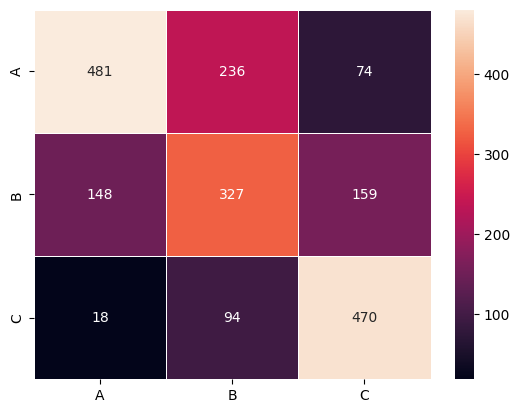

In [25]:
seaborn.heatmap(df_confusion_matrix_KNN, annot = True,linewidth=.5,fmt='.3g')
plt.show()

# Random Forest

In [26]:
#Biblioteki

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [27]:
#Zbiór uczony i trenowany
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [28]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [29]:
#predykcja nowych wartości
y_pred=clf.predict(X_test)

In [30]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred), 2))

Accuracy: 0.72


In [31]:
a = confusion_matrix(y_test, y_pred)

df_confusion_matrix = pd.DataFrame(a.T, columns = ['A','B','C'])
df_confusion_matrix.index  = ['A','B','C']
df_confusion_matrix

,A,B,C
A,801,241,48
B,187,613,200
C,18,158,744


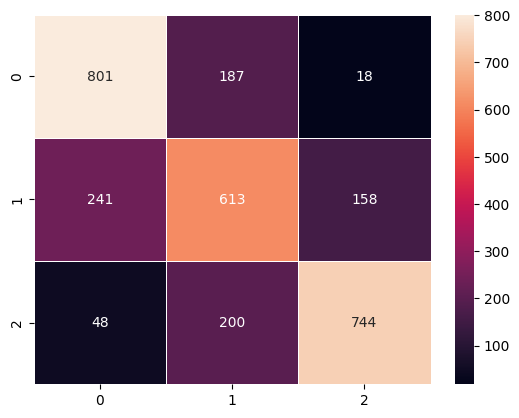

In [32]:
conf_mat = confusion_matrix(y_test, y_pred)


# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)


# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM, annot = True,linewidth=.5,fmt='.3g')
plt.show()

In [47]:
df


,age,gender,BMI,body fat_%,diastolic,systolic,gripForce,sit-ups counts,broad jump_cm,class
0,25,0,20.495868,15.7,77.0,126,36.4,53,229,A
1,42,1,23.540063,32.2,72.0,135,22.7,18,146,C
2,42,0,22.844257,19.3,63.0,110,43.5,68,211,A
3,57,1,20.932120,20.9,69.0,106,21.5,0,90,C
4,45,1,24.959456,30.9,93.0,144,34.1,30,155,A
...,...,...,...,...,...,...,...,...,...,...
10027,49,1,22.708811,36.8,69.0,112,24.6,26,130,B
10028,42,0,24.071870,27.1,79.0,129,39.6,46,212,B
10029,49,0,23.350719,22.1,75.0,146,44.9,48,195,B
10030,29,1,24.554564,33.2,90.0,149,30.3,35,174,B
